## Fourier Series

A periodic function $f(x)$, with no special symmetry (neither odd nor even), defined on a finite interval $0<x<L$ can be written as a Fourier series:
$$ f(x) = \sum_{k=0}^\infty \alpha_k \cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=1}^\infty \beta_k \sin\left(\frac{2\pi kx}{L}\right)$$
A more compact form of this representation is:
$$ f(x) = \sum_{k=-\infty}^\infty \gamma_k \exp\left(i\frac{2\pi k x}{L}\right) $$
Note that the limits run from $-\infty$ to $\infty$. The new coefficients are:
$$ \gamma_k =
\begin{cases}
\frac{1}{2}(\alpha_{-k} + i\beta_{-k}) & {\rm if}\ k<0 \\
\alpha_0 & {\rm if}\ k=0 \\
\frac{1}{2}(\alpha_k - i\beta_k) & {\rm if}\ k>0
\end{cases}
$$
We need to find these coefficients in order to obtain the Fourier series approximation of the function $f(x)$.  
The coefficients can be found as:
$$ \gamma_k = \frac{1}{L} \int_0^L f(x) \exp\left(-i\frac{2\pi kx}{L}\right)\ dx $$

## Discrete Fourier Transform

Especially for functions $f(x)$ for which the integration is either complicated, or is a data set derived from experiments, etc., we can calculate the Fourier coefficients using our favorite numerical integration methods. Trapezoidal rule is a good choice!
$$ \gamma_k = \frac{1}{N} \left[\frac{1}{2}f(0) + \frac{1}{2}f(L) + \sum_{n=1}^{N-1} f(x_n) \exp\left(-i\frac{2\pi kx_n}{L}\right)\right] $$
where we have $N$ slices with width $h=L/N$ and sample points $x_n=(n/N)L$. This can be written in a more compact form, givent that $f(0)=f(L)$, by virtue of the function being periodic.
$$ \gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} f(x_n) \exp\left(-i\frac{2\pi kx_n}{L}\right) $$
If the sample points are represented by $y_n$, we have
$$  c_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi kx_n}{L}\right) $$
and the inverse DFT can be found as
$$  y_n = \frac{1}{N} \sum_{n=0}^{N-1} c_k \exp\left(i\frac{2\pi kx_n}{L}\right) $$

Plot the function
$$ f(x) =
\begin{cases}
1 & -1\leq x \leq 1 \\
0 & {\rm everywhere\ else}
\end{cases}
$$

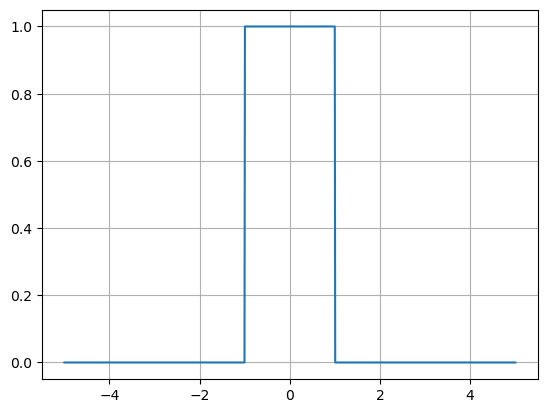

In [ ]:
# plot f(x) vs x
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where((x<=1)&(x>=-1),1,0)

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.grid()

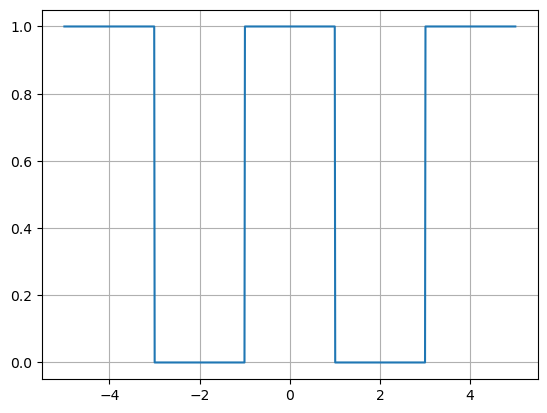

In [ ]:
# make the function appear "periodic" like a square wave
L = 4

def g(y):
    return np.where((y>0), 1, 0)

y = np.sin(2*np.pi*x/L + np.pi/2)
plt.plot(x,g(y))
plt.grid()

For all practical purposes, the sample points $y_n$ are real functions. This means that we need to calculate coefficients $c_k$, with $0\leq k\leq N/2$. All other coefficients are complex conjugates of these. For example, $c_{N-1}=c_1^*$, $c_{N-2}=c_2^*$, and so on.  
If $N$ is even, we need to calculate up to $(N/2)+1$ coefficients. If $N$ is odd, we need to calculate up to $(N+1)/2$ coefficients.

In [ ]:
# write a code that checks if N is even or odd and calculates the upper index
# using if else statement
N = 3
if N%2==0:
    k = (N/2) + 1
else:
    k = (N+1)/2
print(k)

# using integer division
k = N//2 + 1
print(k)
# note that the former produces float, while the latter gives an integer
# if k is used as a counter in for loop, it must be an integer

2.0
2


In [ ]:
# calculate fourier coefficients using trapezoidal method
# start with N = 3

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex) # Fourier coefficients are complex in general
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*x[n]/L)/N
    return c

a, b = -1, 1
N, L = 3, 4
x = np.linspace(-1,1,N)
y = f(x)
c = dft(y)
for i in range(N):
    if i>=N//2+1:
        print(np.conjugate(c[N-i]))
    else:
        print(c[i])

(1+0j)
(0.3333333333333333+0j)
(0.3333333333333333-0j)


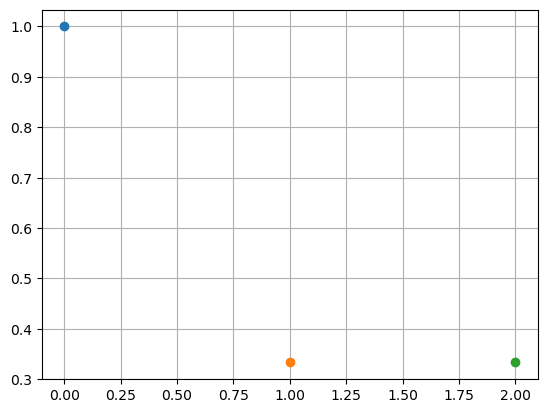

In [ ]:
for i in range(N):
    if i>=N//2+1:
        plt.plot(i,np.real(np.conjugate(c[N-i])),marker='o')
    else:
        plt.plot(i,np.real(c[i]),marker='o')
plt.grid()

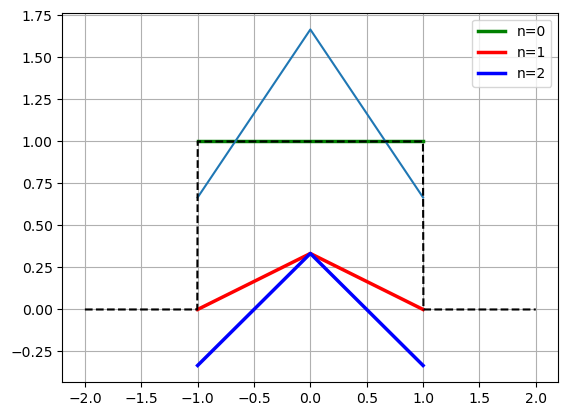

In [ ]:
# plot the series with N=3 and overlay the function f(x)
clr = ['g','r','b']

fsum = np.zeros(N,complex)
for i in range(N):
    if i>=N//2+1:
        plt.plot(x,np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L),color=clr[i],lw=2.5,label='n=%d'%i)
        fsum += np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L)
    else:
        plt.plot(x,c[i]*np.exp(-2j*np.pi*i*x/L),color=clr[i],lw=2.5,label='n=%d'%i)
        fsum += c[i]*np.exp(-2j*np.pi*i*x/L)

plt.plot(x,fsum)
x0 = np.linspace(-2,2,1000)
plt.plot(x0,f(x0),ls='--',c='k')
plt.legend()
plt.grid()

In [ ]:
# now try with N = 20
N = 20
x = np.linspace(-1,1,N)
y = f(x)
c = dft(y)
for i in range(N):
    if i>=N//2+1:
        print(np.conjugate(c[N-i]))
    else:
        print(c[i])

(1.0000000000000002+0j)
(0.6034102639748877+4.163336342344337e-17j)
(-0.04999999999999987+4.591847028356745e-17j)
(-0.1974455348114586-1.249000902703301e-16j)
(0.04999999999999988+2.95937027512416e-17j)
(0.11398851847095438+4.163336342344337e-17j)
(-0.04999999999999989-3.224748979502475e-17j)
(-0.07653069727269662-2.636779683484747e-16j)
(0.04999999999999971-4.489600305612522e-17j)
(0.05431447875564525+8.326672684688674e-17j)
(-0.050000000000000155+3.718396764479354e-16j)
(0.05431447875564525-8.326672684688674e-17j)
(0.04999999999999971+4.489600305612522e-17j)
(-0.07653069727269662+2.636779683484747e-16j)
(-0.04999999999999989+3.224748979502475e-17j)
(0.11398851847095438-4.163336342344337e-17j)
(0.04999999999999988-2.95937027512416e-17j)
(-0.1974455348114586+1.249000902703301e-16j)
(-0.04999999999999987-4.591847028356745e-17j)
(0.6034102639748877-4.163336342344337e-17j)


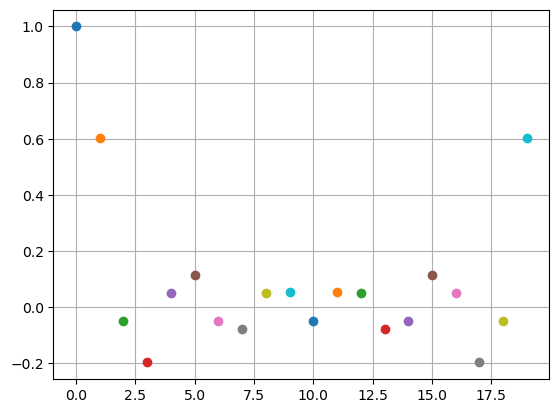

In [ ]:
for i in range(N):
    if i>=N//2+1:
        plt.plot(i,np.real(np.conjugate(c[N-i])),marker='o')
    else:
        plt.plot(i,np.real(c[i]),marker='o')
plt.grid()

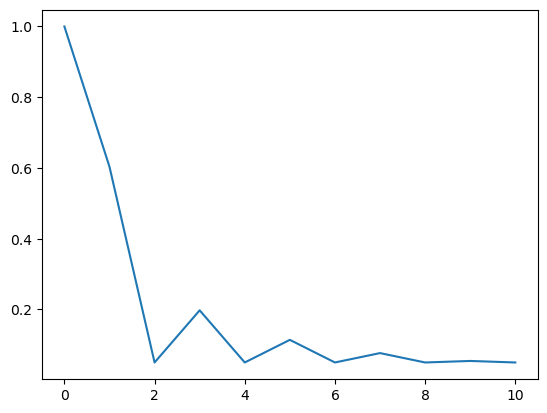

In [ ]:
plt.plot(abs(c))

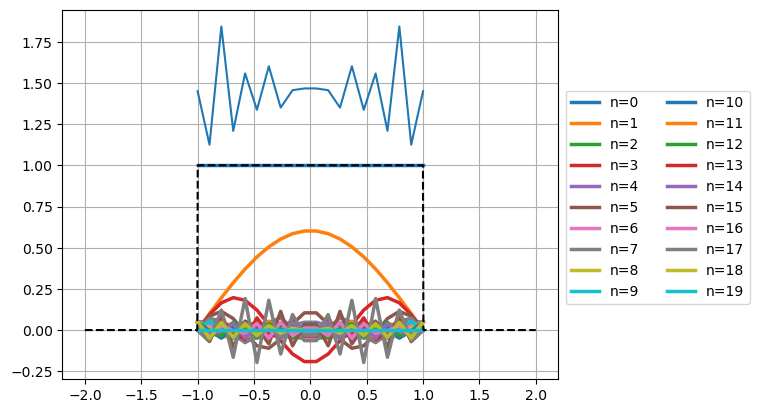

In [ ]:
# plot the series with N=20 and overlay the function f(x)
fsum = np.zeros(N,complex)
for i in range(N):
    if i>=N//2+1:
        plt.plot(x,np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L)
    else:
        plt.plot(x,c[i]*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += c[i]*np.exp(-2j*np.pi*i*x/L)

plt.plot(x,fsum)
x0 = np.linspace(-2,2,1000)
plt.plot(x0,f(x0),ls='--',c='k')
plt.legend(bbox_to_anchor=(1.4, 0.8),ncol=2)
plt.grid()

In [ ]:
# now try with N = 100
N = 100
x = np.linspace(-1,1,N)
y = f(x)
c = dft(y)

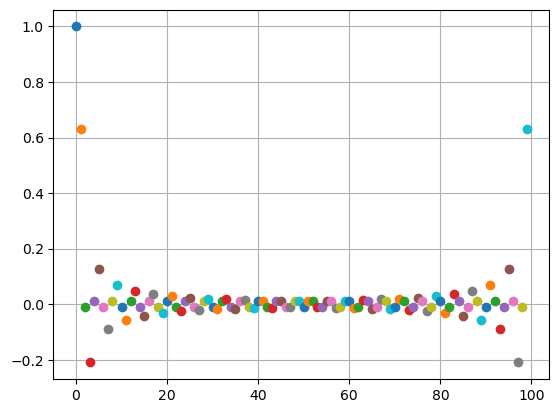

In [ ]:
for i in range(N):
    if i>=N//2+1:
        plt.plot(i,np.real(np.conjugate(c[N-i])),marker='o')
    else:
        plt.plot(i,np.real(c[i]),marker='o')
plt.grid()

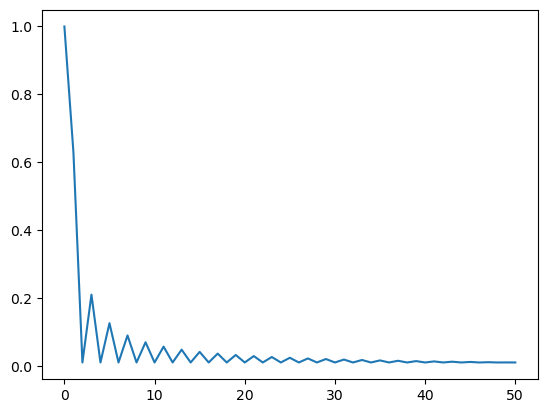

In [ ]:
plt.plot(abs(c))

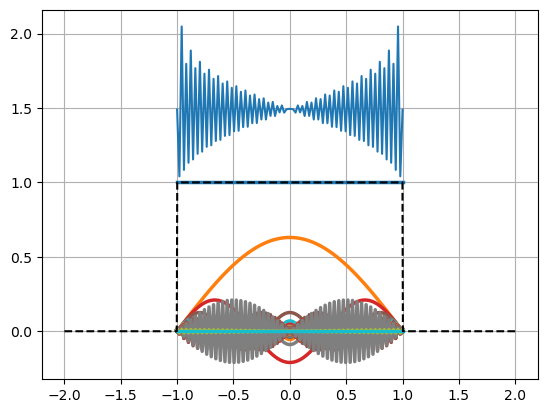

In [ ]:
# plot the series with N=100 and overlay the function f(x)
fsum = np.zeros(N,complex)
for i in range(N):
    if i>=N//2+1:
        plt.plot(x,np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L)
    else:
        plt.plot(x,c[i]*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += c[i]*np.exp(-2j*np.pi*i*x/L)

plt.plot(x,fsum)
x0 = np.linspace(-2,2,1000)
plt.plot(x0,f(x0),ls='--',c='k')
# plt.legend(bbox_to_anchor=(1.2, 1.1),ncol=5)
plt.grid()

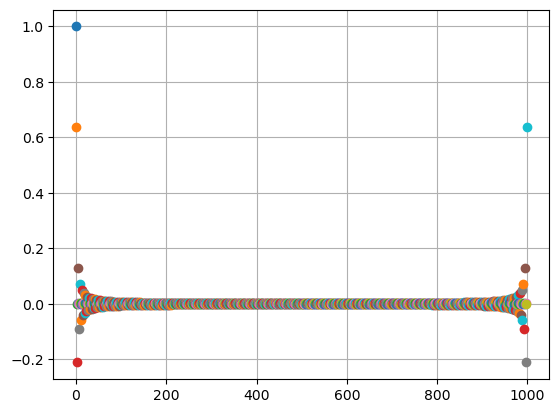

In [ ]:
# now try with N = 1000
N = 1000
x = np.linspace(-1,1,N)
y = f(x)
c = dft(y)
for i in range(N):
    if i>=N//2+1:
        plt.plot(i,np.real(np.conjugate(c[N-i])),marker='o')
    else:
        plt.plot(i,np.real(c[i]),marker='o')
plt.grid()

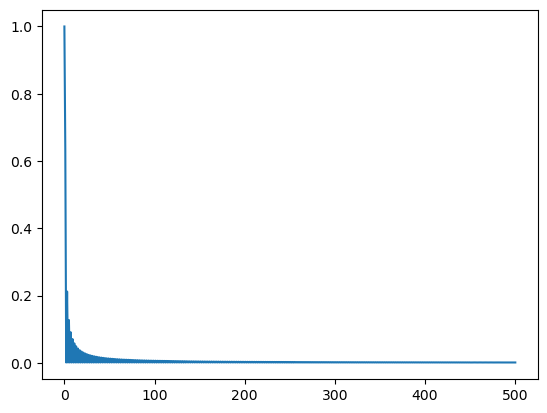

In [ ]:
plt.plot(abs(c))

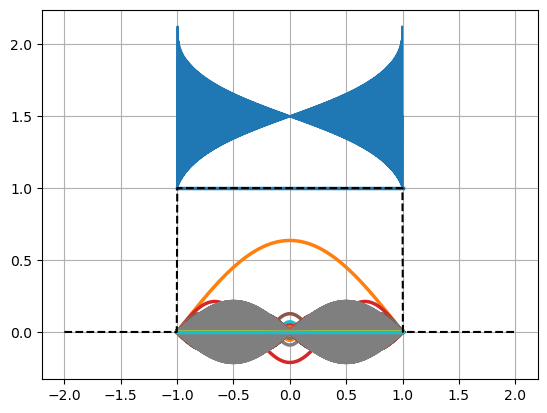

In [ ]:
# plot the series with N=1000 and overlay the function f(x)
fsum = np.zeros(N,complex)
for i in range(N):
    if i>=N//2+1:
        plt.plot(x,np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += np.conjugate(c[N-i])*np.exp(-2j*np.pi*i*x/L)
    else:
        plt.plot(x,c[i]*np.exp(-2j*np.pi*i*x/L),lw=2.5,label='n=%d'%i)
        fsum += c[i]*np.exp(-2j*np.pi*i*x/L)

plt.plot(x,fsum)
x0 = np.linspace(-2,2,1000)
plt.plot(x0,f(x0),ls='--',c='k')
# plt.legend(bbox_to_anchor=(1.2, 1.1),ncol=5)
plt.grid()

The coefficients can be found analytically as:
$$ a_0 = \frac{1}{2}, \quad a_k = \frac{2\sin(k\pi/2)}{k\pi},\quad b_k = 0$$

<function matplotlib.pyplot.show(close=None, block=None)>

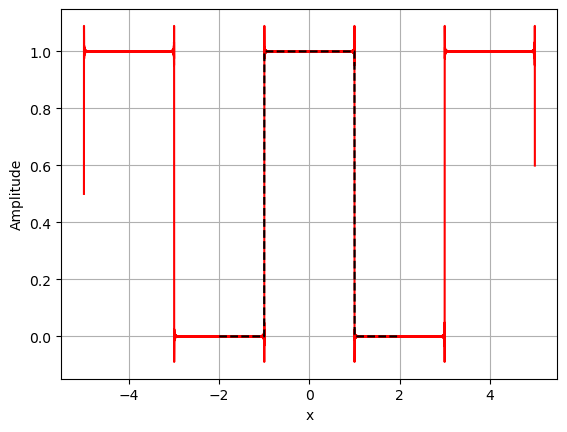

In [ ]:
# plot Fourier series with analytical coefficients
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-5,5,0.0001)
L=4
X0 = 0.5
amplitude = X0
k = 1
i = 0

while i<1000:  #Change the value of i to change the number of harmonics added
  X = np.power(-1, (k-1)/2)*(2/(np.pi*k))*np.cos((2*np.pi*k*x)/L)
  amplitude = amplitude + X
  k+=2
  i+=1

plt.plot(x,amplitude,color='red')
plt.plot(x0,f(x0),ls='--',c='k')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid()
plt.show

### Download the file "pitch.txt" from "data_files" folder in the repository.

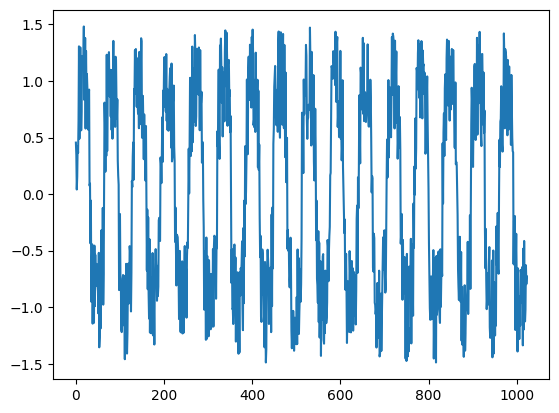

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y = np.loadtxt("pitch.txt",float)
N = len(y)
x = np.arange(0,N)

plt.plot(y)
plt.show()

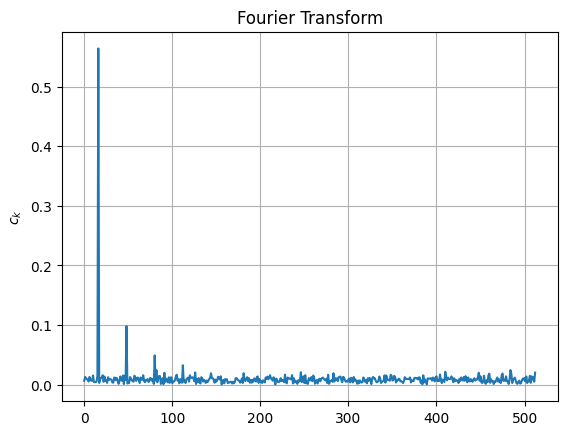

In [8]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)/N
    return c

c = dft(y)
plt.plot(abs(c))
plt.title('Fourier Transform')
plt.grid()
plt.ylabel(r'$c_k$')
plt.show()

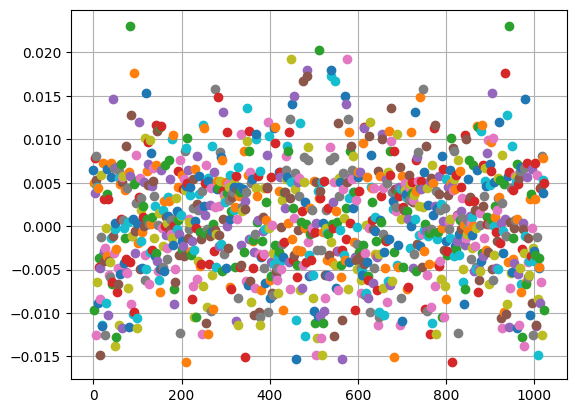

In [9]:
for i in range(N):
    if i>=N//2+1:
        plt.plot(i,np.real(np.conjugate(c[N-i])),marker='o')
    else:
        plt.plot(i,np.real(c[i]),marker='o')
plt.grid()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


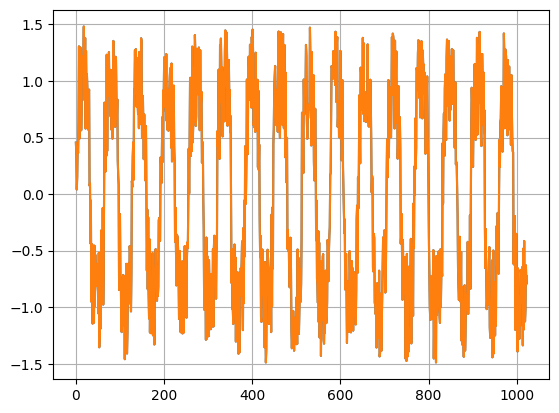

In [21]:
x = np.arange(0,N)
L = N

def idft(c):
    yn = np.zeros(N,complex)
    for n in range(N):
        for k in range(N):
          if k<N//2+1:
              cv = c[k]
          else:
              cv = np.conjugate(c[N-k])
          yn[n] += cv*np.exp(2j*np.pi*k*n/N)
    return yn

plt.plot(x,idft(c))#,ls='--',color='k')
plt.plot(y)
plt.grid()

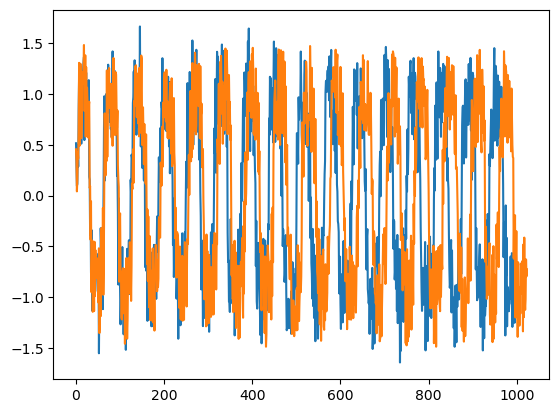

In [ ]:
cn = np.zeros(N,complex)
for i in range(N):
    if i<N//2+1:
        cn[i] = c[i]
    else:
        cn[i] = np.conjugate(c[N-i])
plt.plot(np.fft.ifft(cn*N))
plt.plot(y)

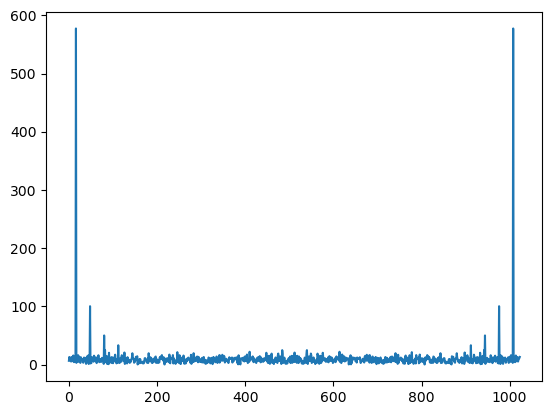

In [ ]:
plt.plot(abs(np.fft.fft(y)))

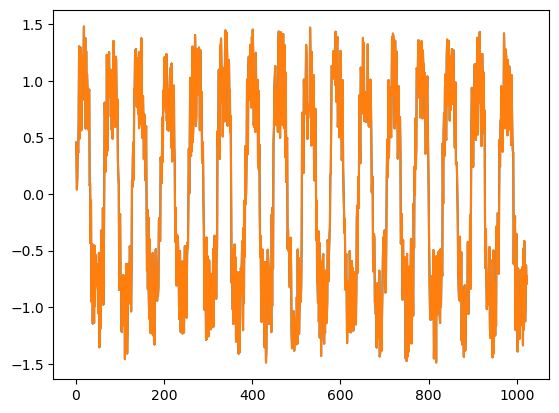

In [ ]:
c = np.fft.fft(y)
plt.plot(np.fft.ifft(c))
plt.plot(y)

# Try it yourself

### Total 4 marks

Solve part (b) of Exercise 7.1, using the user-defined function for DFT used in class today.